Outline:

- Data 
- Scaling
- Train, test split
- PCA on 2 dimensions / 3 dimensions (Optional)
- Plot on PCA results (Optional)
- t-SNE in 2d (Optional)

- Try k-nn with the simple k = 5 (since we have 4 labels) (It is nice to scale the data in order to compute the distances)
- Grid search between "1 and 20" and "uniform vs distance" based weights 

- Try SVM with linear kernel with default values (dual = False)
- Randomized Grid search between "1 and 20" and "uniform vs distance" based weights

- Confusion Matrix, Accuracy, Precision ??? (For multiple classes??), ROC OVO multiclass


SET A RANDOM STATE IN ORDER TO OBTAIN CONSISTENCY


In [53]:
#Major imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data preprocessing

We first download the data and prepare them to be fed into the Classifiers

In [54]:
df = pd.read_csv("mldata_0003159045.csv")

df.head()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,0,3,-1.869350,3.559079,-1.145611,-3.840056,0.627002,-1.486503,-1.116860,-0.501075,...,0.204709,-0.731950,-0.938675,2.816732,1.072657,2.367081,-1.187479,0.748156,-0.185988,0.226795
1,1,3,0.619341,2.486762,0.009735,-4.773803,-0.377366,1.428685,-0.278266,-0.674745,...,-1.420404,-1.188352,-0.840943,0.824977,1.991146,0.333274,2.879939,0.256975,0.074700,0.467322
2,2,2,5.821832,4.911420,1.803447,3.634988,0.038141,0.850619,-1.253547,0.490986,...,1.316830,-0.130740,-0.987596,-2.987699,2.098421,0.926776,-0.121936,-0.156706,0.131401,0.518553
3,3,2,1.076023,-3.296251,0.764935,-5.657998,-0.250583,1.352594,0.517906,-0.542137,...,-2.347694,0.018713,0.480454,1.733611,-0.397137,0.177095,1.015141,-0.012718,0.042500,-0.161039
4,4,3,0.231785,1.866774,-3.300366,-7.653516,-0.097803,-0.822568,0.894497,0.640398,...,0.512948,-0.421881,1.318767,-1.513659,0.855297,-0.219029,2.704655,-0.442440,-0.032237,0.096417


In [55]:
df.describe()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
count,1400.0000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,699.5000,1.480714,0.717343,0.528495,0.028657,-0.008994,-0.027702,0.121780,0.113305,0.076414,...,0.173745,-0.142779,0.027352,-0.492885,0.106520,0.139698,0.444864,0.048502,0.017547,0.100318
std,404.2895,1.104762,2.348130,3.124755,1.792042,6.383400,0.481900,1.187348,0.803036,0.923880,...,2.265375,1.010277,1.195219,2.360631,1.288370,1.140858,2.343031,0.412483,0.127287,1.119546
min,0.0000,0.000000,-7.023354,-9.951135,-6.282387,-23.267880,-1.545825,-5.015833,-3.001043,-3.177070,...,-7.172480,-3.387446,-5.482780,-7.846504,-4.038293,-3.728404,-7.693023,-1.394450,-0.455536,-3.670045
25%,349.7500,1.000000,-0.866371,-1.620745,-1.175103,-4.487222,-0.365906,-0.687716,-0.441010,-0.570926,...,-1.360553,-0.827322,-0.656273,-2.066851,-0.782531,-0.640120,-1.064708,-0.216123,-0.067654,-0.648519
50%,699.5000,1.000000,0.641637,0.608123,0.009671,-0.104565,-0.014860,0.157844,0.114960,0.071775,...,0.156540,-0.162254,0.034969,-0.592626,0.047029,0.105411,0.266358,0.044178,0.016816,0.085650
75%,1049.2500,2.000000,2.135757,2.527115,1.197216,4.363047,0.322528,0.874309,0.650354,0.730473,...,1.735518,0.554277,0.830831,0.970230,1.007300,0.924540,1.876943,0.317549,0.101601,0.873565
max,1399.0000,3.000000,8.700184,14.646834,6.122488,23.904006,1.349306,3.763556,2.856206,3.193338,...,8.387536,3.300346,3.700360,7.313998,4.096346,4.015861,8.337685,1.495295,0.482167,3.697693


In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("label", axis = 1), df["label"], test_size = 0.30)

print( f"X_train size : {X_train.shape}   X_test size : {X_test.shape}    y_train size : {y_train.shape}    y_test size : {y_test.shape}")

X_train size : (980, 21)   X_test size : (420, 21)    y_train size : (980,)    y_test size : (420,)


We now scale the data with a Standard scaler in order to obtain 0 mean and variance 1

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_train_scaled

array([[ 0.54179249,  1.80255923,  0.31516871, ..., -0.17040367,
         1.06806907, -0.10504337],
       [ 1.43151158, -0.37111545, -0.68759637, ...,  1.97566443,
        -0.45540942, -0.53354036],
       [ 1.67550656,  0.18076468,  0.42633543, ..., -0.40358759,
         1.17824826, -1.58279596],
       ...,
       [ 1.43890536,  0.00861193, -1.40492975, ..., -0.72464195,
        -0.39111944,  0.80854537],
       [ 1.39454264, -0.82291362,  0.79109147, ...,  0.36553233,
         2.02624354, -2.10233973],
       [ 1.42411779, -1.03546723,  2.38750906, ..., -2.48578787,
         0.07311196, -0.99202728]])

## Data analisys and visualisation

We now perform some data analisys on the given dataset in order to explore it and eventually capture some features from basic visualisations

### 2d PCA
Strating from PCA we first analise the 2 features that best explain the variance of the data and we plot them in a 2d plot in order to eventually capture some insights.

In [58]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components= 2)

X_train_projected_2d = pca_2d.fit_transform(X_train)

pca_2d.explained_variance_ratio_.sum()


0.9997570816438358

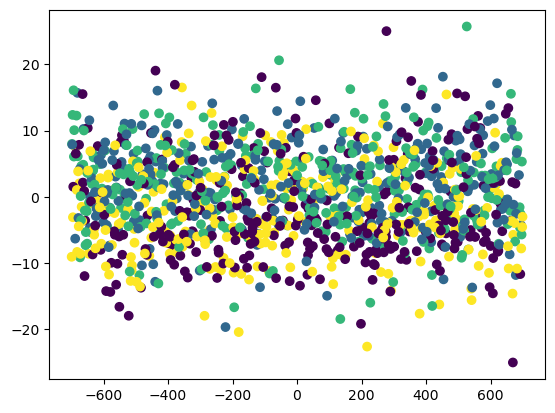

In [59]:
plt.scatter(X_train_projected_2d[:, 0], X_train_projected_2d[:, 1],  c=y_train)
plt.show()

Even though the dimensions expressed in the pca explained almost 99% of the variance they failed at classifying the points in a linear manner. Thus taking us to make further analysis.

### 3d PCA
So we porform a 3d PCA in order to try to find linear classification boundaries

In [60]:
pca_3d = PCA(n_components= 3)

X_train_projected_3d = pca_3d.fit_transform(X_train)

pca_3d.explained_variance_ratio_.sum()

0.9998201798816666

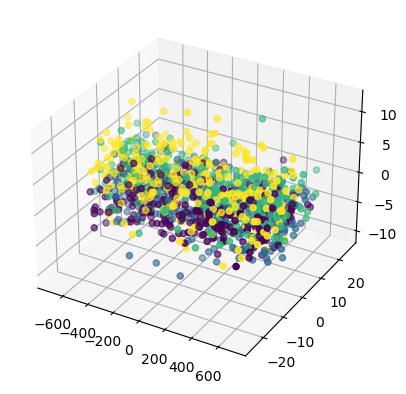

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_projected_3d[:, 0], X_train_projected_3d[:, 1], X_train_projected_3d[:, 2], c = y_train)

plt.show()

As expected the same thing happened to the the 3d pca resulting in an uncapability to split the data linearly with this method.

### 2d t-SNE
We now employ another technique to try to visualise the classification boundaries before passing to more advanced methods.

In [62]:
from sklearn.manifold import TSNE

#Take a look at the attributes here !!!
X_train_reduced = TSNE(n_components=2 , learning_rate='auto', init='random', perplexity = 60).fit_transform(X_train)

X_train_reduced.shape

(1260, 2)

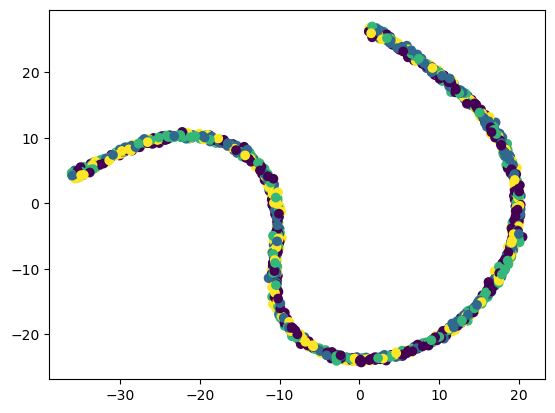

In [63]:
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1],  c=y_train)
plt.show()

plt.show()

Resulting in an unuseful technique once again in this problem.

## K-Nearest Neighbors

We decide to employ one among the most used classification algorithms in the world.

In [64]:
#Since in the kNN algorithm we deal with distances the use of scaled data is a suitable choice in order to give every feature the same importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV, cross_validate
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [65]:
knn_simple = Pipeline([
    ("scaler" , StandardScaler()),
     ("knn", KNeighborsClassifier()) #Where here the default number of neighbors is 5 (exactly the number of our labels + 1)
])

knn_simple_scores = cross_validate(knn_simple, X_train, y_train, scoring= "accuracy")
knn_simple_scores

{'fit_time': array([0.00703812, 0.00425124, 0.00562215, 0.00533485, 0.00511599]),
 'score_time': array([0.02485919, 0.01530385, 0.01456881, 0.01493311, 0.01532507]),
 'test_score': array([0.61904762, 0.63095238, 0.6468254 , 0.6031746 , 0.64285714])}

In [143]:
knn_simple_scores["test_score"].mean()

0.6285714285714286

In [144]:
knn_simple.fit(X_train, y_train)
y_pred_simple = knn_simple.predict(X_test)
print(accuracy_score(y_test, y_pred_simple))

0.6309523809523809


Confusion matrix, without normalization
[[24  6  3  2]
 [ 6 31  0  0]
 [ 5  4 20  4]
 [ 7  8  0 20]]
Normalized confusion matrix
[[0.68571429 0.17142857 0.08571429 0.05714286]
 [0.16216216 0.83783784 0.         0.        ]
 [0.15151515 0.12121212 0.60606061 0.12121212]
 [0.2        0.22857143 0.         0.57142857]]


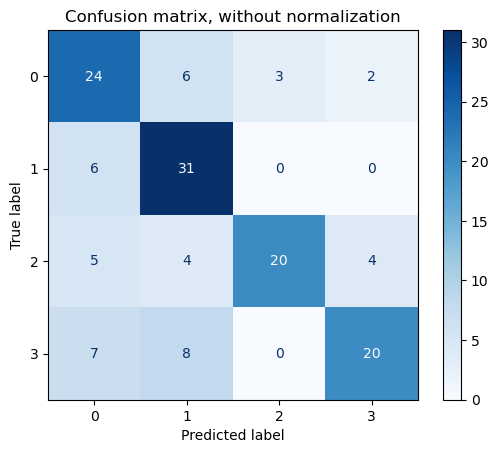

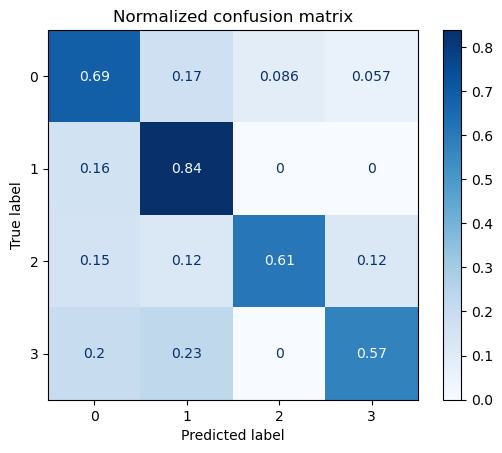

In [68]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        knn_simple,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [69]:
knn_pipeline = Pipeline([
    ("scaler" , StandardScaler()),
     ("knn", KNeighborsClassifier())
])


knn_param_grid ={ 
    "knn__n_neighbors" : range(1,120) ,
    "knn__weights" : ["uniform", "distance"]
}

knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, scoring= "accuracy") #Accuracy is more suitable since we are doing classification
knn_grid_search.fit(X_train, y_train) #Here we use the raw data since scaling is performed in the pipeline itself

print("Best HyperParameters: ", knn_grid_search.best_params_)
print("Best Accuracy: ", knn_grid_search.best_score_)

Best HyperParameters:  {'knn__n_neighbors': 60, 'knn__weights': 'uniform'}
Best Accuracy:  0.7261904761904762


In [145]:
knn_final = knn_grid_search.best_estimator_
knn_final_accuracy = accuracy_score(y_test, knn_final.predict(X_test))
knn_final_accuracy

0.7095238095238096

Confusion matrix, without normalization
[[23  6  5  1]
 [ 4 29  1  3]
 [ 1  3 26  3]
 [ 1 12  0 22]]
Normalized confusion matrix
[[0.65714286 0.17142857 0.14285714 0.02857143]
 [0.10810811 0.78378378 0.02702703 0.08108108]
 [0.03030303 0.09090909 0.78787879 0.09090909]
 [0.02857143 0.34285714 0.         0.62857143]]


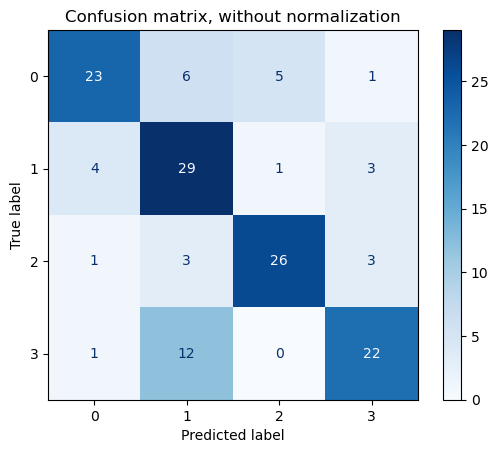

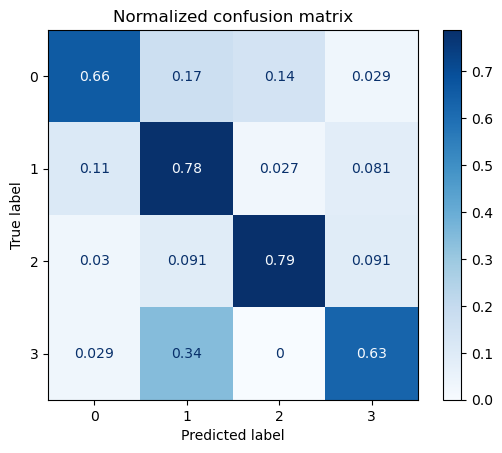

In [71]:
titles_options_final = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options_final:
    disp = ConfusionMatrixDisplay.from_estimator(
        knn_final,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [147]:
knn_param_grid_2 ={ 
    "knn__n_neighbors" : range(1,20) ,
    "knn__weights" : ["uniform", "distance"]
}

knn_grid_search_2 = GridSearchCV(knn_pipeline, knn_param_grid_2, scoring= "accuracy") #Accuracy is more suitable since we are doing classification
knn_grid_search_2.fit(X_train, y_train) #Here we use the raw data since scaling is performed in the pipeline itself

print("Best HyperParameters: ", knn_grid_search_2.best_params_)
print("Best Accuracy: ", knn_grid_search_2.best_score_)

Best HyperParameters:  {'knn__n_neighbors': 19, 'knn__weights': 'distance'}
Best Accuracy:  0.7275510204081632


In [148]:
knn_final_2 = knn_grid_search_2.best_estimator_
knn_final_2_accuracy = accuracy_score(y_test, knn_final_2.predict(X_test))
knn_final_2_accuracy

0.669047619047619

Confusion matrix, without normalization
[[24  7  4  0]
 [ 4 29  3  1]
 [ 1  5 23  4]
 [ 4  7  1 23]]
Normalized confusion matrix
[[0.68571429 0.2        0.11428571 0.        ]
 [0.10810811 0.78378378 0.08108108 0.02702703]
 [0.03030303 0.15151515 0.6969697  0.12121212]
 [0.11428571 0.2        0.02857143 0.65714286]]


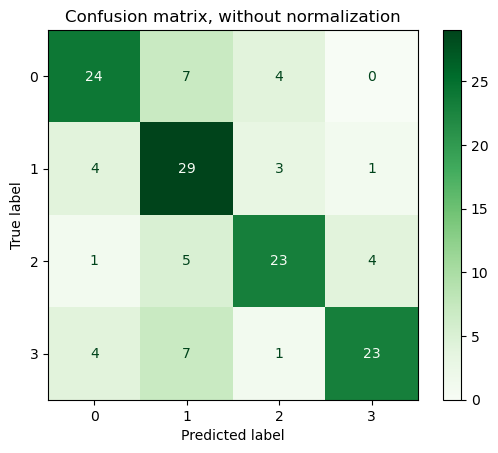

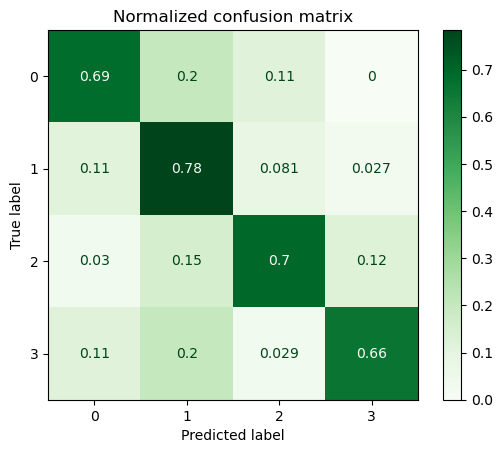

In [74]:
titles_options_final_2 = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options_final_2:
    disp = ConfusionMatrixDisplay.from_estimator(
        knn_final_2,
        X_test,
        y_test,
        cmap=plt.cm.Greens,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

So we find that the best estimator for the grid search cross validation gives that the best accuracy is obtained with 48 neighbors for which we give a weight proportional to the inverse of the distance (in order to deal with the relative high dimension of the space)

## Support Vector Machine with Linear Kernel

We now use the Support Vector Machines with linear kernel in order to solve the same classification problem and address the best algorithm to perform the task.

In [75]:
from sklearn.svm import LinearSVC
from scipy.stats import uniform

### Implementation with raw data
We use the original data first and feed it directly in the model. So we create two different pipelines for the data that will be later evaluated.

Watch out that hinge cannot be used when the dual = False (neither with "l1" nor with "l2"), hence the space of hyperparameters pins down to just choosing l1 and l2 penalty with "squared_hinge" loss on a given interval for C (the regularization parameter).

In [76]:
svm_raw_simple = LinearSVC(max_iter = 60000) 
svm_raw_simple_scores = cross_validate(svm_raw_simple, X_train, y_train, scoring= "accuracy")
svm_raw_simple_scores

/Users/alessandropranzo/opt/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alessandropranzo/opt/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alessandropranzo/opt/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alessandropranzo/opt/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alessandropranzo/opt/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'fit_time': array([12.29909396, 11.46128702, 12.70531201, 11.68126702, 12.00014997]),
 'score_time': array([0.00214672, 0.00222397, 0.00246191, 0.00234318, 0.00195789]),
 'test_score': array([0.6984127 , 0.54365079, 0.63492063, 0.58333333, 0.54761905])}

In [77]:
svm_raw_simple_scores["test_score"].mean()

0.6015873015873016

In [78]:
svm_raw_simple.fit(X_train, y_train)
accuracy_score(y_test, svm_raw_simple.predict(X_test))

/Users/alessandropranzo/opt/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6642857142857143

Confusion matrix, without normalization
[[31  2  2  0]
 [16 11  4  6]
 [ 3  1 25  4]
 [ 5  2  2 26]]
Normalized confusion matrix
[[0.88571429 0.05714286 0.05714286 0.        ]
 [0.43243243 0.2972973  0.10810811 0.16216216]
 [0.09090909 0.03030303 0.75757576 0.12121212]
 [0.14285714 0.05714286 0.05714286 0.74285714]]


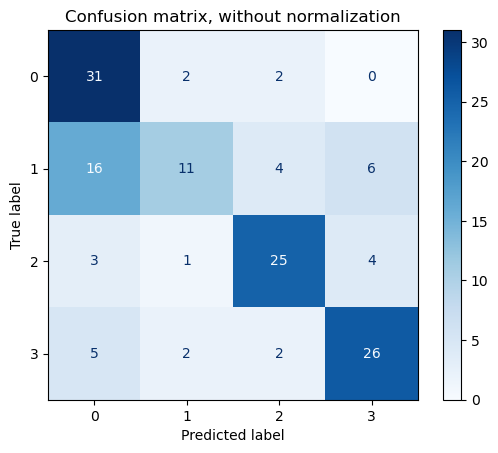

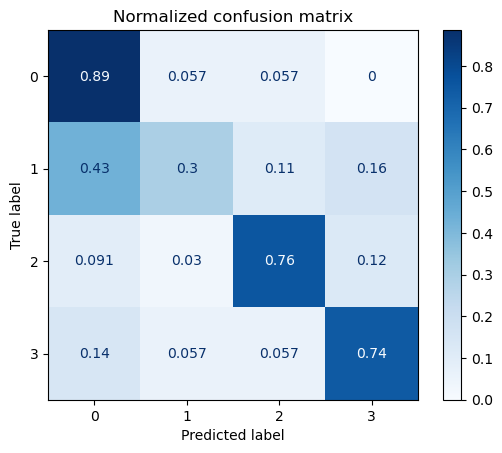

In [79]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        svm_raw_simple,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [80]:
# Watch out here!!! The l1 penalty and the hinge penalty cannot be used simultaneously so we split the search in two (search1 with hinge vs squared_hinge)
# Furthermore we choose ovr for the multiclass attribute to the end of easing the computation
svm_param_grid = {
    "penalty" : ["l1", "l2"],
    "C" : uniform(1.0, 10)     #We arrive up to 10 in order to have margins large enough !!!
}

svm_grid_search = RandomizedSearchCV(LinearSVC(loss = "squared_hinge", dual = False, max_iter= 30000), svm_param_grid, n_iter = 50, scoring = "accuracy") #Here we put False as value for the dual since our dataset is composed of an higher number of samples (1256 in the training set) vs the number of features (20)
svm_grid_search.fit(X_train, y_train)

print(f"Best HyperParameters: {svm_grid_search.best_params_}")
print(f"Best Accuracy: {svm_grid_search.best_score_}")

Best HyperParameters: {'C': 9.372965925665795, 'penalty': 'l1'}
Best Accuracy: 0.7301587301587302


In [128]:
raw_svm_final = svm_grid_search.best_estimator_
raw_svm_final_accuracy = accuracy_score(y_train, raw_svm_final.predict(X_train))
raw_svm_final_accuracy

0.7418367346938776

Confusion matrix, without normalization
[[69 28 10  2]
 [13 87 11  8]
 [ 6  6 81 11]
 [ 8  7  7 66]]
Normalized confusion matrix
[[0.63302752 0.25688073 0.09174312 0.01834862]
 [0.1092437  0.73109244 0.09243697 0.06722689]
 [0.05769231 0.05769231 0.77884615 0.10576923]
 [0.09090909 0.07954545 0.07954545 0.75      ]]


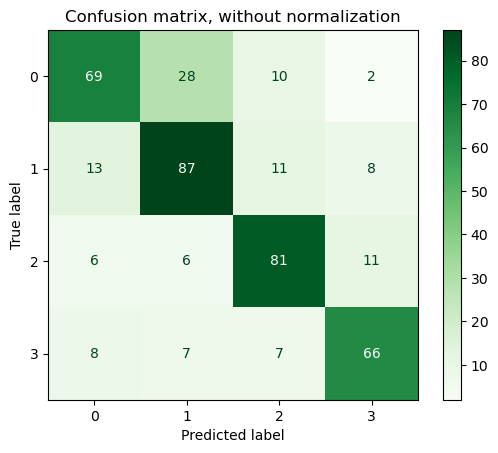

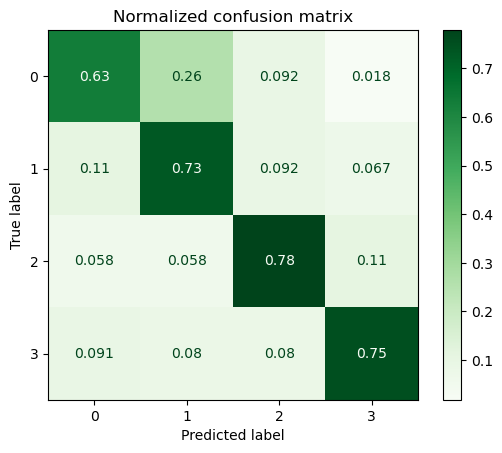

In [123]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        raw_svm_final,
        X_test,
        y_test,
        cmap=plt.cm.Greens,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Implementation with scaled data

We now perform the same algorithm as above but firstly we scale the data before feeding it into the machine.

In [94]:
svm_scaled_simple = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", LinearSVC(max_iter = 60000) )
]) 

svm_scaled_simple_scores = cross_validate(svm_scaled_simple, X_train, y_train, scoring= "accuracy")
svm_scaled_simple_scores

{'fit_time': array([0.39432001, 0.46674728, 0.58691406, 0.31821084, 0.23553324]),
 'score_time': array([0.00522399, 0.00182199, 0.00323486, 0.00184512, 0.00187111]),
 'test_score': array([0.72222222, 0.74603175, 0.74206349, 0.71428571, 0.71825397])}

In [95]:
svm_scaled_simple_scores["test_score"].mean()

0.7285714285714286

In [96]:
svm_scaled_simple.fit(X_train, y_train)
accuracy_score(y_test, svm_scaled_simple.predict(X_test))

0.6642857142857143

Confusion matrix, without normalization
[[19 10  5  1]
 [ 8 24  2  3]
 [ 0  4 25  4]
 [ 1  6  3 25]]
Normalized confusion matrix
[[0.54285714 0.28571429 0.14285714 0.02857143]
 [0.21621622 0.64864865 0.05405405 0.08108108]
 [0.         0.12121212 0.75757576 0.12121212]
 [0.02857143 0.17142857 0.08571429 0.71428571]]


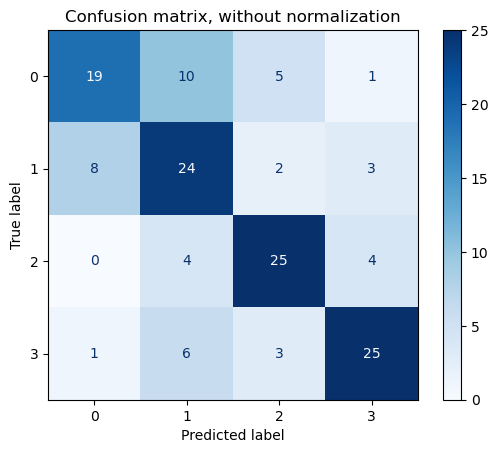

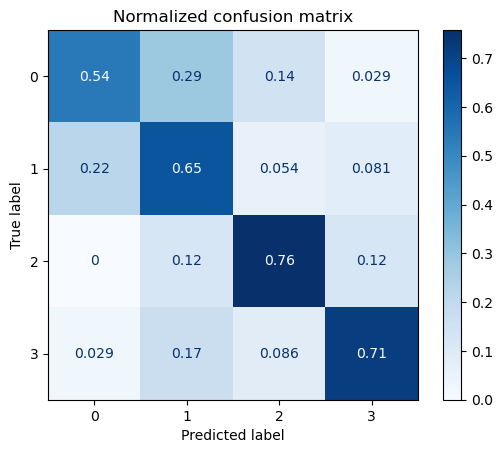

In [85]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options_final_2:
    disp = ConfusionMatrixDisplay.from_estimator(
        svm_scaled_simple,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [86]:
scaled_svm_pipeline = Pipeline([ 
    ("scaler" , StandardScaler()), 
    ("svm" , LinearSVC(loss = "squared_hinge", dual = False, max_iter= 30000))
])

scaled_svm_param_grid = {
    "svm__penalty" : ["l1", "l2"],
    "svm__C" : uniform(1.0, 10)     #We arrive up to 10 in order to have margins large enough !!!
}

scaled_svm_grid_search = RandomizedSearchCV(scaled_svm_pipeline, scaled_svm_param_grid, n_iter = 50, scoring= "accuracy")
scaled_svm_grid_search.fit(X_train, y_train)

print(f"Best HyperParameters: {scaled_svm_grid_search.best_params_}")
print(f"Best Accuracy: {scaled_svm_grid_search.best_score_}")

Best HyperParameters: {'svm__C': 3.2641752188351596, 'svm__penalty': 'l1'}
Best Accuracy: 0.7293650793650794


In [127]:
scaled_svm_final = scaled_svm_grid_search.best_estimator_
scaled_svm_final_accuracy = accuracy_score(y_test, scaled_svm_final.predict(X_test))
scaled_svm_final_accuracy

0.7214285714285714

Confusion matrix, without normalization
[[19 10  5  1]
 [ 8 24  2  3]
 [ 0  4 25  4]
 [ 1  6  3 25]]
Normalized confusion matrix
[[0.54285714 0.28571429 0.14285714 0.02857143]
 [0.21621622 0.64864865 0.05405405 0.08108108]
 [0.         0.12121212 0.75757576 0.12121212]
 [0.02857143 0.17142857 0.08571429 0.71428571]]


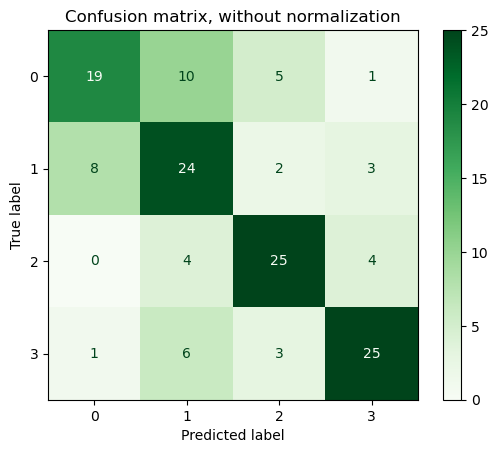

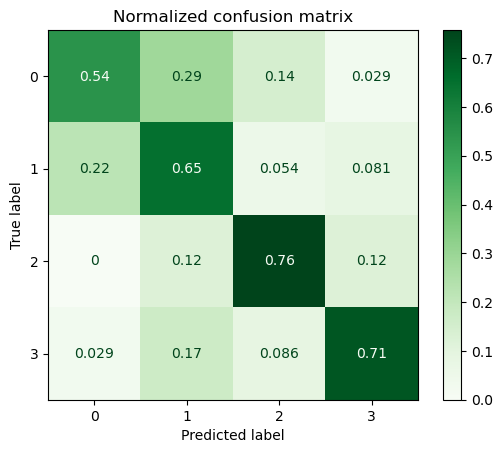

In [88]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options_final_2:
    disp = ConfusionMatrixDisplay.from_estimator(
        scaled_svm_final,
        X_test,
        y_test,
        cmap=plt.cm.Greens,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Support Vector Machines with non-linear Kernels

Due to the poor accuracy obtained with the previous models we now explore new models in order to obtain a better performance on the test set.


In [89]:
from sklearn.svm import SVC

In [105]:
rbf_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf"))
])

rbf_svm_scores = cross_validate(rbf_svm, X_train, y_train, scoring = "accuracy")
rbf_svm_scores

{'fit_time': array([0.06941891, 0.03383183, 0.03632927, 0.03247619, 0.03382516]),
 'score_time': array([0.02291322, 0.01792431, 0.01833177, 0.01634002, 0.01616573]),
 'test_score': array([0.76530612, 0.78061224, 0.76020408, 0.75      , 0.75      ])}

In [106]:
rbf_svm_scores["test_score"].mean()

0.7612244897959184

In [107]:
rbf_svm.fit(X_train, y_train)
accuracy_score(y_test, rbf_svm.predict(X_test))

0.7571428571428571

Confusion matrix, without normalization
[[82 19  8  0]
 [12 94  7  6]
 [ 7  9 80  8]
 [11  9  6 62]]
Normalized confusion matrix
[[0.75229358 0.17431193 0.0733945  0.        ]
 [0.10084034 0.78991597 0.05882353 0.05042017]
 [0.06730769 0.08653846 0.76923077 0.07692308]
 [0.125      0.10227273 0.06818182 0.70454545]]


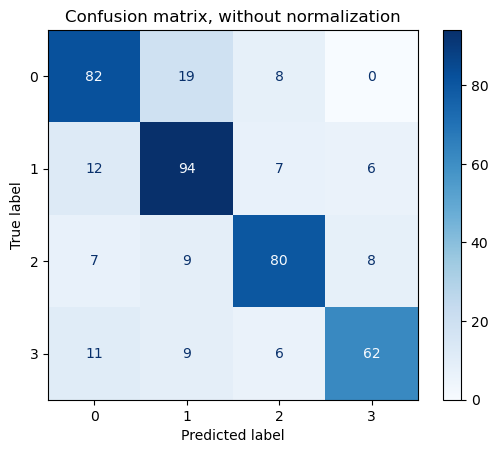

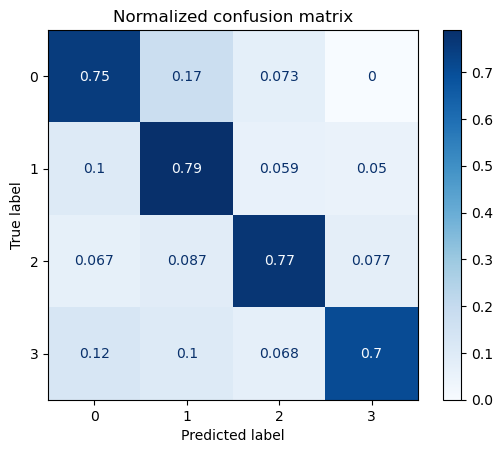

In [109]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options_final_2:
    disp = ConfusionMatrixDisplay.from_estimator(
        rbf_svm,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [119]:
nonlin_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(gamma = "auto")) # gamma isn't "scale" since data is already scaled, hence their variance is 1 so "auto" = "scale"
])

nonlin_svm_paramters = {
    "svm__C" : uniform(0.1, 2),
    "svm__kernel" : ["rbf", "poly", "sigmoid"],
}

nonlin_svm_grid_search = RandomizedSearchCV(nonlin_svm, nonlin_svm_paramters, n_iter= 100, scoring = "accuracy")
nonlin_svm_grid_search.fit(X_train, y_train)

print(f"Best HyperParameters: {nonlin_svm_grid_search.best_params_}")
print(f"Best Accuracy: {nonlin_svm_grid_search.best_score_}")

Best HyperParameters: {'svm__C': 1.4356013949978945, 'svm__kernel': 'rbf'}
Best Accuracy: 0.7622448979591836


In [126]:
svm_final = nonlin_svm_grid_search.best_estimator_
svm_final_accuracy = accuracy_score(y_test, svm_final.predict(X_test))
svm_final_accuracy

0.7666666666666667

Confusion matrix, without normalization
[[84 16  9  0]
 [11 95  7  6]
 [ 6  8 82  8]
 [11  9  7 61]]
Normalized confusion matrix
[[0.7706422  0.14678899 0.08256881 0.        ]
 [0.09243697 0.79831933 0.05882353 0.05042017]
 [0.05769231 0.07692308 0.78846154 0.07692308]
 [0.125      0.10227273 0.07954545 0.69318182]]


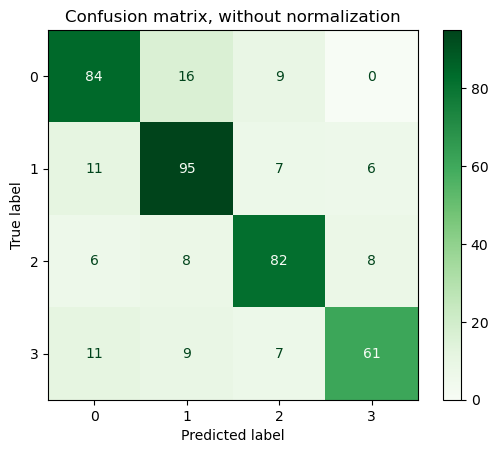

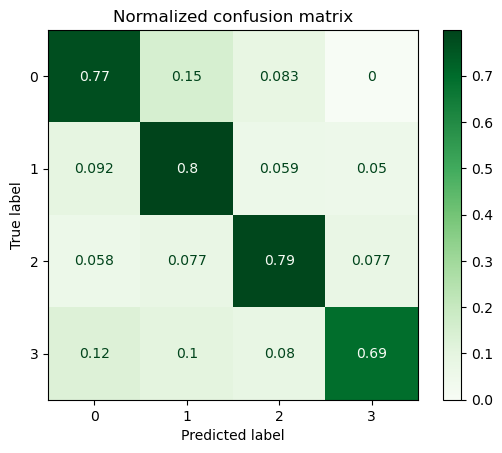

In [121]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options_final_2:
    disp = ConfusionMatrixDisplay.from_estimator(
        svm_final,
        X_test,
        y_test,
        cmap=plt.cm.Greens,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Model Selection

We now use different metrics to evaluate all the models we developed and choose the best describes the problem

In [164]:
from sklearn.metrics import recall_score, precision_score, recall_score, roc_curve, auc, roc_auc_score

In [182]:
# A function that returns respectively the accuracy, precision and recall of a selected model

def model_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average = "macro"), recall_score(y_test, y_pred, average = "macro"))


#This function serves in order to plot 
def show_metrics(models, models_names, scores):
    
    fig, ax = plt.subplots(layout='constrained')
    x = np.arange(len(models))
    width = 0.25
    i = 0

    for metric, value in scores.items():
        offset = width * i 
        rect = ax.bar(x + offset, value, label = metric, width= width)

    ax.set_ylabel("Score (from 0 to 1)")
    ax.set_xlabel("Models")
    ax.set_title("Accuracy, Precision, Recall scores for differnt models")
    ax.set_xticks(x + width, models_names)
    ax.legend()

    plt.show()

In [184]:
models = [knn_final, knn_final_2, raw_svm_final, scaled_svm_final, svm_final]
models_names = ["60-nn", "19-nn", "raw lin SVM", "scaled lin SVM", "rbf SVM"]

scores = {
    "Accuracy" : [model_metrics(model,X_test, y_test)[0] for model in models],
    "Precision" : [model_metrics(model, X_test, y_test)[1] for model in models],
    "Recall": [model_metrics(model, X_test, y_test)[2] for model in models]
}

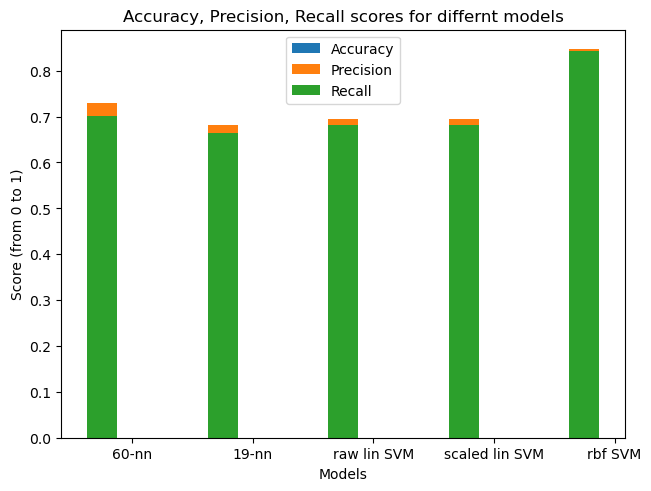

In [185]:
show_metrics(models,models_names, scores)